In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import

In [17]:
ass = pd.read_csv('/content/drive/MyDrive/assessments[1].csv')
crs = pd.read_csv('/content/drive/MyDrive/courses[1].csv')
stinf = pd.read_csv('/content/drive/MyDrive/studentInfo[1].csv')
stdreg = pd.read_csv('/content/drive/MyDrive/studentRegistration[1].csv')
vle = pd.read_csv('/content/drive/MyDrive/vle[1].csv')
stdass = pd.read_csv('/content/drive/MyDrive/studentAssessment[1].csv')
std = pd.read_csv('/content/drive/MyDrive/studentVle[1].csv')

Assessments

In [14]:
# Melihat informasi sekilas dari DataFrame assessments.csv
ass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


Dari info kita mendapati 11 data dengan value null di atribut date

In [18]:
#Mencari Instance dengan Date yang NaN
ass.loc[ass['date'].isna()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [19]:
# Mengisi value null
ass = ass.fillna(ass['date'].max())

Pada penjelasan Atribut "Jika informasi mengenai tanggal ujian tidak ada, tanggalnya ada pada tanggal presentasi yang akhir". Dari kalimat ini saya menyimpulkan jika tanggal ujian adalah tanggal akhir dari presentasi yang terakhir, maka saya mengganti nilai NaN menjadi nilai maximum dari date.

In [20]:
crs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [21]:
crs.groupby('code_module', group_keys=True).apply(lambda x:x)

code_module code_presentation  module_presentation_length
code_module                                                             
AAA         0          AAA             2013J                         268
            1          AAA             2014J                         269
BBB         2          BBB             2013J                         268
            3          BBB             2014J                         262
            4          BBB             2013B                         240
            5          BBB             2014B                         234
CCC         6          CCC             2014J                         269
            7          CCC             2014B                         241
DDD         8          DDD             2013J                         261
            9          DDD             2014J                         262
            10         DDD             2013B                         240
            11         DDD             2014B                         241
EEE         12         EEE             2013J                         268
            13         EEE             2014J                         269
            14         EEE             2014B                         241
FFF         15         FFF             2013J                         268
            16         FFF             2014J                         269
            17         FFF             2013B                         240
            18         FFF             2014B                         241
GGG         19         GGG             2013J                         261
            20         GGG             2014J                         269
            21         GGG             2014B                         241

In [22]:
# Informasi Singkat dari Dataset Student Info
stinf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [23]:
# Instance dengan nilai NaN
stinf.loc[stinf['imd_band'].isna()]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass
17,AAA,2013J,71361,M,Ireland,HE Qualification,NaN,35-55,0,60,N,Pass
28,AAA,2013J,104476,M,Ireland,Post Graduate Qualification,NaN,35-55,0,60,N,Pass
34,AAA,2013J,114017,F,North Region,Post Graduate Qualification,NaN,35-55,0,60,N,Pass
65,AAA,2013J,172112,M,Ireland,HE Qualification,NaN,35-55,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
30552,GGG,2013J,589914,M,North Region,Lower Than A Level,NaN,0-35,0,30,N,Pass
31170,GGG,2014B,575199,F,North Western Region,Lower Than A Level,NaN,0-35,0,30,N,Pass
31389,GGG,2014B,617889,F,South West Region,Lower Than A Level,NaN,0-35,0,30,N,Fail
31777,GGG,2014B,634470,F,South Region,A Level or Equivalent,NaN,0-35,0,30,N,Distinction


In [24]:
# Mengisi NaN dengan modus
stinf = stinf.fillna(str(stinf['imd_band'].mode()))

In [25]:
stdreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [26]:
stdreg.sort_values('id_student')

,code_module,code_presentation,id_student,date_registration,date_unregistration
14394,DDD,2013J,3733,-68.0,-8.0
383,AAA,2014J,6516,-52.0,NaN
14395,DDD,2013J,8462,-137.0,119.0
17560,DDD,2014J,8462,-38.0,18.0
0,AAA,2013J,11391,-159.0,NaN
...,...,...,...,...,...
30058,FFF,2014J,2702660,NaN,9.0
14392,DDD,2013B,2707979,NaN,NaN
14393,DDD,2013B,2710343,NaN,NaN
17559,DDD,2014B,2710343,NaN,NaN


In [27]:
stdreg.sort_values('id_student')

,code_module,code_presentation,id_student,date_registration,date_unregistration
14394,DDD,2013J,3733,-68.0,-8.0
383,AAA,2014J,6516,-52.0,NaN
14395,DDD,2013J,8462,-137.0,119.0
17560,DDD,2014J,8462,-38.0,18.0
0,AAA,2013J,11391,-159.0,NaN
...,...,...,...,...,...
30058,FFF,2014J,2702660,NaN,9.0
14392,DDD,2013B,2707979,NaN,NaN
14393,DDD,2013B,2710343,NaN,NaN
17559,DDD,2014B,2710343,NaN,NaN


In [28]:
# Mengganti NaN dengan 0
stdreg = stdreg.fillna(0)

In [29]:
# Informasi Data Frame StudentAssessment
stdass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [30]:
# Jumlah dari Value NaN
stdass.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [31]:
# Mengecek Value yang NaN
stdass.loc[stdass['score'].isna()]

,id_assessment,id_student,date_submitted,is_banked,score
215,1752,721259,22,0,NaN
937,1754,260355,127,0,NaN
2364,1760,2606802,180,0,NaN
3358,14984,186780,77,0,NaN
3914,14984,531205,26,0,NaN
...,...,...,...,...,...
148929,34903,582670,241,0,NaN
159251,37415,610738,87,0,NaN
166390,37427,631786,221,0,NaN
169725,37435,648110,62,0,NaN


In [32]:
# Merubah NaN menjadi nilai 0
stdass = stdass.fillna(0)

In [33]:
# Informasi singkat dataset VLE
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [34]:
# Menampilkan VLE tanpa nilai NaN
vle.loc[vle['week_from'].notna()]

,id_site,code_module,code_presentation,activity_type,week_from,week_to
113,546732,AAA,2013J,oucontent,2.0,2.0
198,546719,AAA,2013J,oucontent,1.0,1.0
210,546681,AAA,2013J,oucontent,1.0,1.0
264,877040,AAA,2014J,oucontent,2.0,2.0
323,877045,AAA,2014J,oucontent,1.0,1.0
...,...,...,...,...,...,...
6243,798728,GGG,2014B,resource,1.0,1.0
6266,897051,GGG,2014J,resource,2.0,2.0
6285,897121,GGG,2014J,resource,1.0,1.0
6304,897050,GGG,2014J,resource,1.0,1.0


In [35]:
# Mengisi nilai NaN dengan mean week_from
vle = vle.fillna(round(vle['week_from'].mean()))

In [36]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [37]:
std.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

<Axes: >

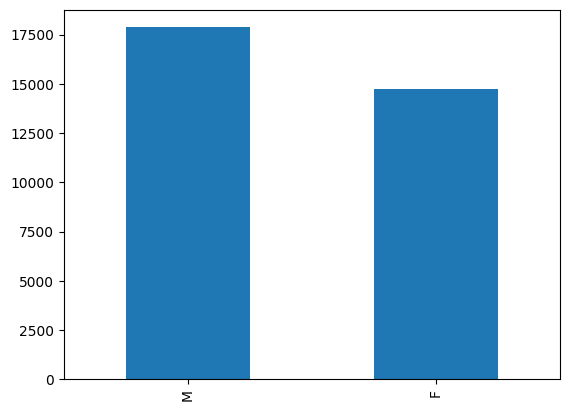

In [38]:
# Plot dari berapa banyak siswa berdasarkan gender
pd.value_counts(stinf['gender']).plot.bar()

<Axes: >

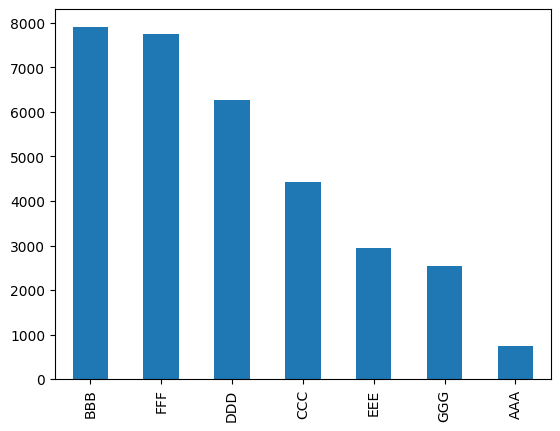

In [39]:
# Plot dari berapa banyak siswa yang mengambil masing masing course
pd.value_counts(stinf['code_module']).plot.bar()

<Axes: ylabel='code_module'>

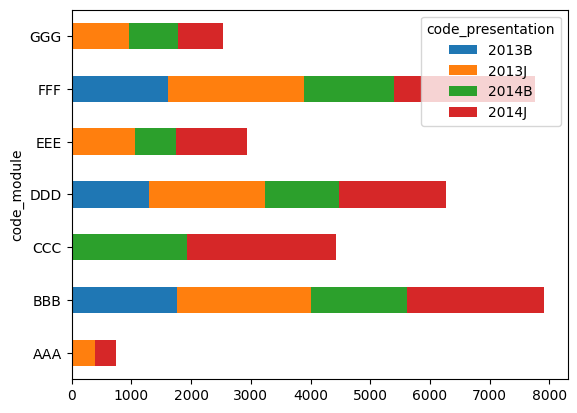

In [42]:
#plot dari berapa banyak siswa yang mengambil masing masing course dengan code_presentation yang berbeda
pd.crosstab(stinf.code_module, stinf.code_presentation).plot.barh(stacked = True)